In [81]:
import pandas as pd
import geopandas as gpd
import numpy as np
import shapely
import pathlib
import swifter
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

from shapely import wkt
from shapely.geometry import Point, Polygon, LineString, MultiPoint

import geojson
import h3

DIR_ROOT = os.path.join(pathlib.Path().absolute(), '../../..' )

In [82]:
# list of all metrices used in the analysis
metrics = [
    #'act_day', 
    #'act_stay',
    'act_sum',
    'day_sum',
    'stay_avg',
    'stay_sum',
    
    'travel',
 
    'centr_closes',
    'centr_between',
    'centr_eigen',
    'centr_infos',
    
    'infl_dist',
    'infl_reg',
    'infl_sum',
]

In [83]:
# merge all metrices with the list of destinations

df = pd.read_csv(DIR_ROOT + '/data/02_processed/destinations.csv', index_col='name')

for metric in metrics:
    df_metric = pd.read_csv(DIR_ROOT + '/data/05_metrics/' + metric + '.csv', index_col=0)
    df_metric.rename(columns={
       'p1': metric + '_p1', 
       'p2': metric + '_p2',
       'p3': metric + '_p3',
       'p4': metric + '_p4',
       'p5': metric + '_p5',
       'pall': metric + '',
    }, inplace=True)
    df_metric.drop(columns=['geometry'], inplace=True) 
    df_metric = (df_metric - df_metric.min()) / (df_metric.max() - df_metric.min())

    # merge to the table with all destinations
    df = pd.concat([df, df_metric], axis=1, join="inner")

In [84]:
df['median'] = df.apply(lambda x: x[metrics].median(), axis=1)
df['median_p1'] = df.apply(lambda x: x[[m + '_p1' for m in metrics]].median(), axis=1)
df['median_p2'] = df.apply(lambda x: x[[m + '_p2' for m in metrics]].median(), axis=1)
df['median_p3'] = df.apply(lambda x: x[[m + '_p3' for m in metrics]].median(), axis=1)
df['median_p4'] = df.apply(lambda x: x[[m + '_p4' for m in metrics]].median(), axis=1)
df['median_p5'] = df.apply(lambda x: x[[m + '_p5' for m in metrics]].median(), axis=1)
df.sort_values('median', ascending=False)

,Unnamed: 0,id,no_alle,no_activity,no_reise,no_bi,no_gg,x,y,prazision,...,infl_sum_p3,infl_sum_p4,infl_sum_p5,infl_sum,median,median_p1,median_p2,median_p3,median_p4,median_p5
Praha,417,421.0,397.0,170.0,174.0,44.0,9.0,50.09,14.41,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.191353,0.990171,1.000000,1.000000,1.000000
Wien,628,632.0,266.0,115.0,123.0,20.0,8.0,48.22,16.39,1.0,...,0.418919,0.864865,NaN,0.735577,0.688986,0.690270,0.928558,0.383373,0.585440,0.000000
Brno,43,44.0,104.0,42.0,48.0,10.0,4.0,49.19,16.61,1.0,...,0.135135,0.418919,0.411765,0.307692,0.377510,0.000000,0.239401,0.181523,0.477014,0.463261
Krems an der Donau,228,229.0,72.0,30.0,30.0,5.0,7.0,48.41,15.62,1.0,...,NaN,0.027027,NaN,0.173077,0.244043,1.000000,0.479375,0.000000,0.111361,0.000000
Písek,393,396.0,28.0,13.0,13.0,1.0,1.0,49.31,14.15,1.0,...,0.162162,0.094595,NaN,0.120192,0.238117,0.000000,0.233924,0.323937,0.125585,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marchegg,279,280.0,7.0,2.0,2.0,2.0,1.0,48.26,16.89,1.0,...,NaN,NaN,NaN,NaN,0.001032,0.000000,0.000000,0.000000,0.003356,0.000000
Mariazell,281,282.0,5.0,2.0,2.0,0.0,1.0,47.77,15.32,1.0,...,NaN,NaN,NaN,NaN,0.000392,0.000000,0.000000,0.000000,0.000157,0.000000
Seitenstetten,494,498.0,5.0,1.0,1.0,3.0,0.0,48.04,14.65,1.0,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Friesach,112,113.0,11.0,4.0,4.0,2.0,1.0,46.98,14.33,1.0,...,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

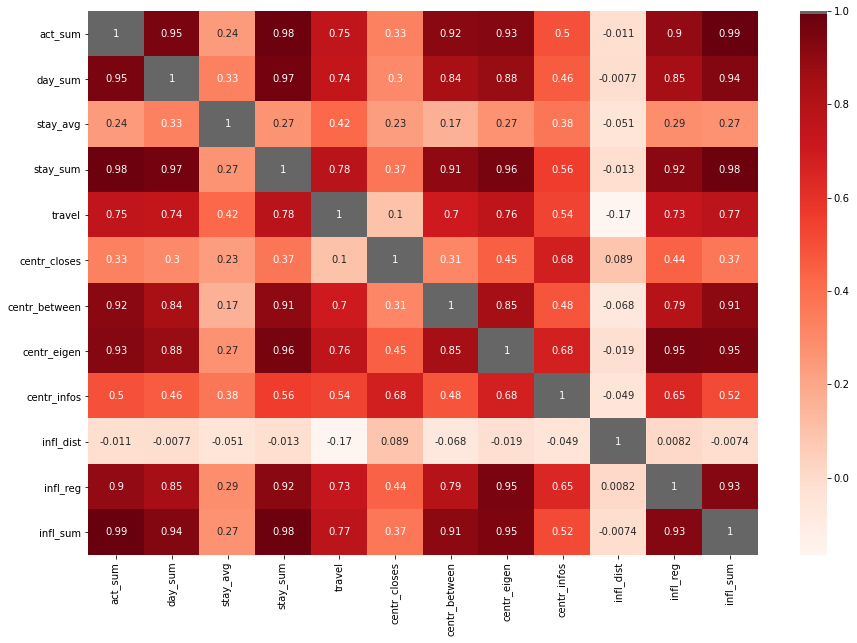

In [124]:
corr = df[metrics].corr()
# corr.mean())

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,10))
cscheme = cm.get_cmap('Reds', 256)
newcolors = cscheme(np.linspace(0, 1, 256))

#for metric in corr.index:
#    corr.at[metric, metric] = (corr.sum()[metric] - 1) / len(metrics)

black = np.array([0.4,0.4,0.4,1])

# white color at the beginning of the scale, black at the end
newcolors[255:256, :] = black

newcmp = ListedColormap(newcolors)

sns.heatmap(corr, cmap=newcmp, annot=True)

In [100]:
corr.index = corr.index + str(corr.mean()[corr.index])

In [86]:
# get order for each metric

df_matrices_order = pd.DataFrame(index=df.index)

for metric in metrics:
    df_copy = df.copy()
    df_copy.sort_values(metric, inplace=True, ascending=False)
    df_copy.reset_index(inplace=True)
    df_copy['rank'] = df_copy.index.values
    df_copy.set_index('index', inplace=True)
    df_matrices_order[metric] = df_copy[['rank']] + 1

df_matrices_order.loc['Praha']

act_sum           1
day_sum           1
stay_avg          4
stay_sum          1
travel            1
centr_closes      5
centr_between     1
centr_eigen       1
centr_infos       1
infl_dist        24
infl_reg          1
infl_sum          1
Name: Praha, dtype: int64

In [87]:
import altair as alt

max_rank = 10

# get list of important places
imp_places = []
for metric in metrics:
    imp_places_m = df_matrices_order[df_matrices_order[metric] <= max_rank].index
    imp_places.extend(imp_places_m)

imp_places = np.unique(np.array(imp_places))


imp_places = df_matrices_order.loc[imp_places]
imp_places['name'] = imp_places.index

alt.renderers.set_embed_options(
    padding={"left": 5, "right": 10, "bottom": 5, "top": 0}
)

rank_chart = alt.Chart(imp_places).transform_window(
    index='count()'
).transform_fold(
    metrics
).properties(
    width=1000,
    height=600
).encode(
    color=alt.Color('name:N', legend=None),
    x=alt.X(
        'key:N',
        axis=alt.Axis(title='metrics'),
        sort=metrics
    ),
    y=alt.Y(
        'value:Q', 
        scale=alt.Scale(zero=False, domain=[max_rank + 0.1,0.1], nice=False),
        axis=alt.Axis(values=[i for i in range(1, max_rank+1)], tickMinStep=0.1, title='rank', format='.0f'),
    ),
)

lines = rank_chart.mark_line(
    clip=True,
    strokeWidth=.5,
    strokeDash=[5,3]
)

circles = rank_chart.mark_circle(
    clip=True,
    size=100,
    strokeOpacity=1,
    strokeWidth=1.5
).encode(
    stroke=alt.Color('name:N', legend=None),
)

labels = rank_chart.mark_text(
    clip=True,
    align='center',
    baseline='middle',
    dy=-15,
    fontWeight='bold',
    fill='black',
).encode(
    y=alt.Y('value:Q'),
    text='name:N',
)

lines + circles + labels

alt.LayerChart(...)

In [88]:
time_medians = ['median_p1', 'median_p2', 'median_p3', 'median_p4', 'median_p5']

time_df = df[time_medians + ['region1', 'median']]
time_df['name'] = time_df.index
time_df.rename(columns= {
    'median_p1': 'period 1',
    'median_p2': 'period 2', 
    'median_p3': 'period 3', 
    'median_p4': 'period 4', 
    'median_p5': 'period 5'
}, inplace=True)
time_medians = ['period 1', 'period 2', 'period 3', 'period 4', 'period 5']

locations_by_median = time_df.sort_values(['median'], inplace=True, ascending=False)

time_df = time_df[time_df['median'] > 0.05]

time_chart = alt.Chart(time_df).transform_window(
    index='count()'
).transform_fold(
    time_medians
).encode(
    color=alt.Color('name:N', legend=None),
    x=alt.X(
        'name:N',
        axis=alt.Axis(title='localities'),
        sort=locations_by_median
    ),
    y=alt.Y(
        'key:N',
        scale=alt.Scale(zero=False, domain=time_medians, nice=False),
    ),
)

circles = time_chart.mark_circle(
    clip=True,
    strokeOpacity=1,
    strokeWidth=1.5
).encode(
    size=alt.Size('value:Q', legend=None),
    color=alt.Color('region1:N', legend=None),
)

circles

<ipython-input-88-a854e0af655d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['name'] = time_df.index
/home/adam/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-88-a854e0af655d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations_by_median = time_df.sort_values(['m

alt.Chart(...)

In [89]:
df.to_csv(DIR_ROOT + '/data/06_outputs/localities.csv')